In [53]:
#Let's start with importing necessary Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score , confusion_matrix , roc_curve , roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [54]:
data = pd.read_csv("https://raw.githubusercontent.com/training-ml/Files/main/diabetes.csv") # Reading the Data
data.head(8)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0


In [9]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [55]:
data.shape

(768, 9)

In [56]:
data.describe

<bound method NDFrame.describe of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627  

In [12]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [57]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

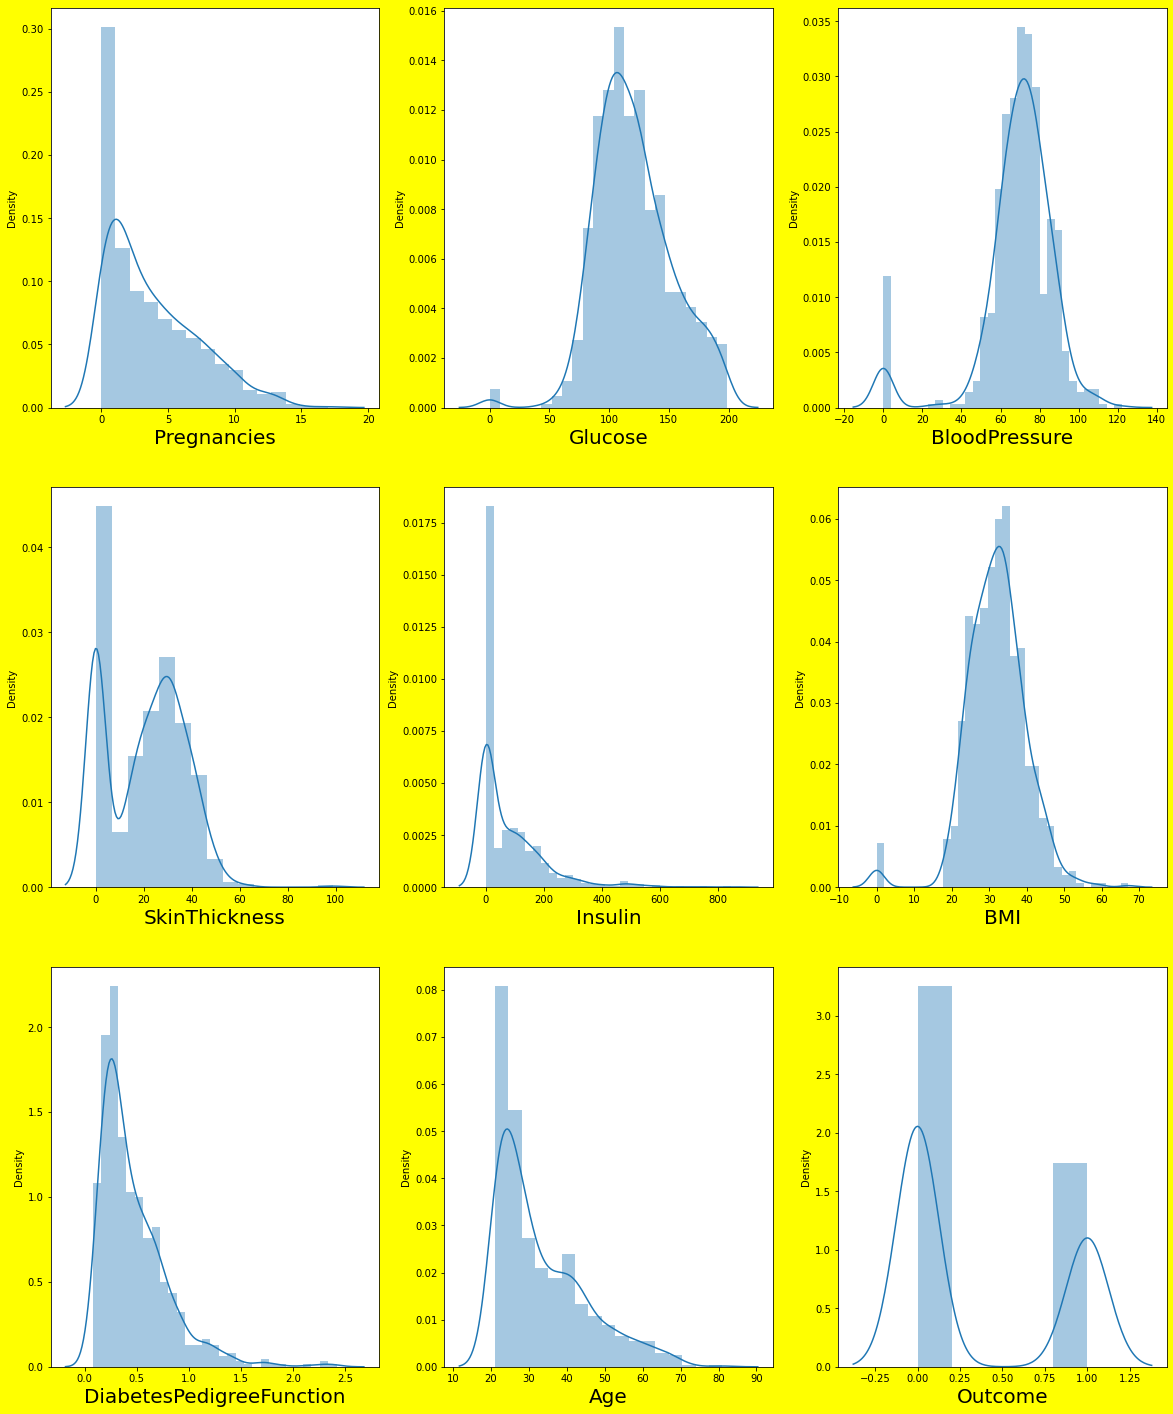

In [29]:
#EDA
#Let's see how data is distributed for every column
plt.figure(figsize = (20,25), facecolor = 'yellow')
plotnumber=1
for column in data:
    if plotnumber <= 9: #column is 9 in number
        ax = plt.subplot(3,3, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber+= 1
plt.show()


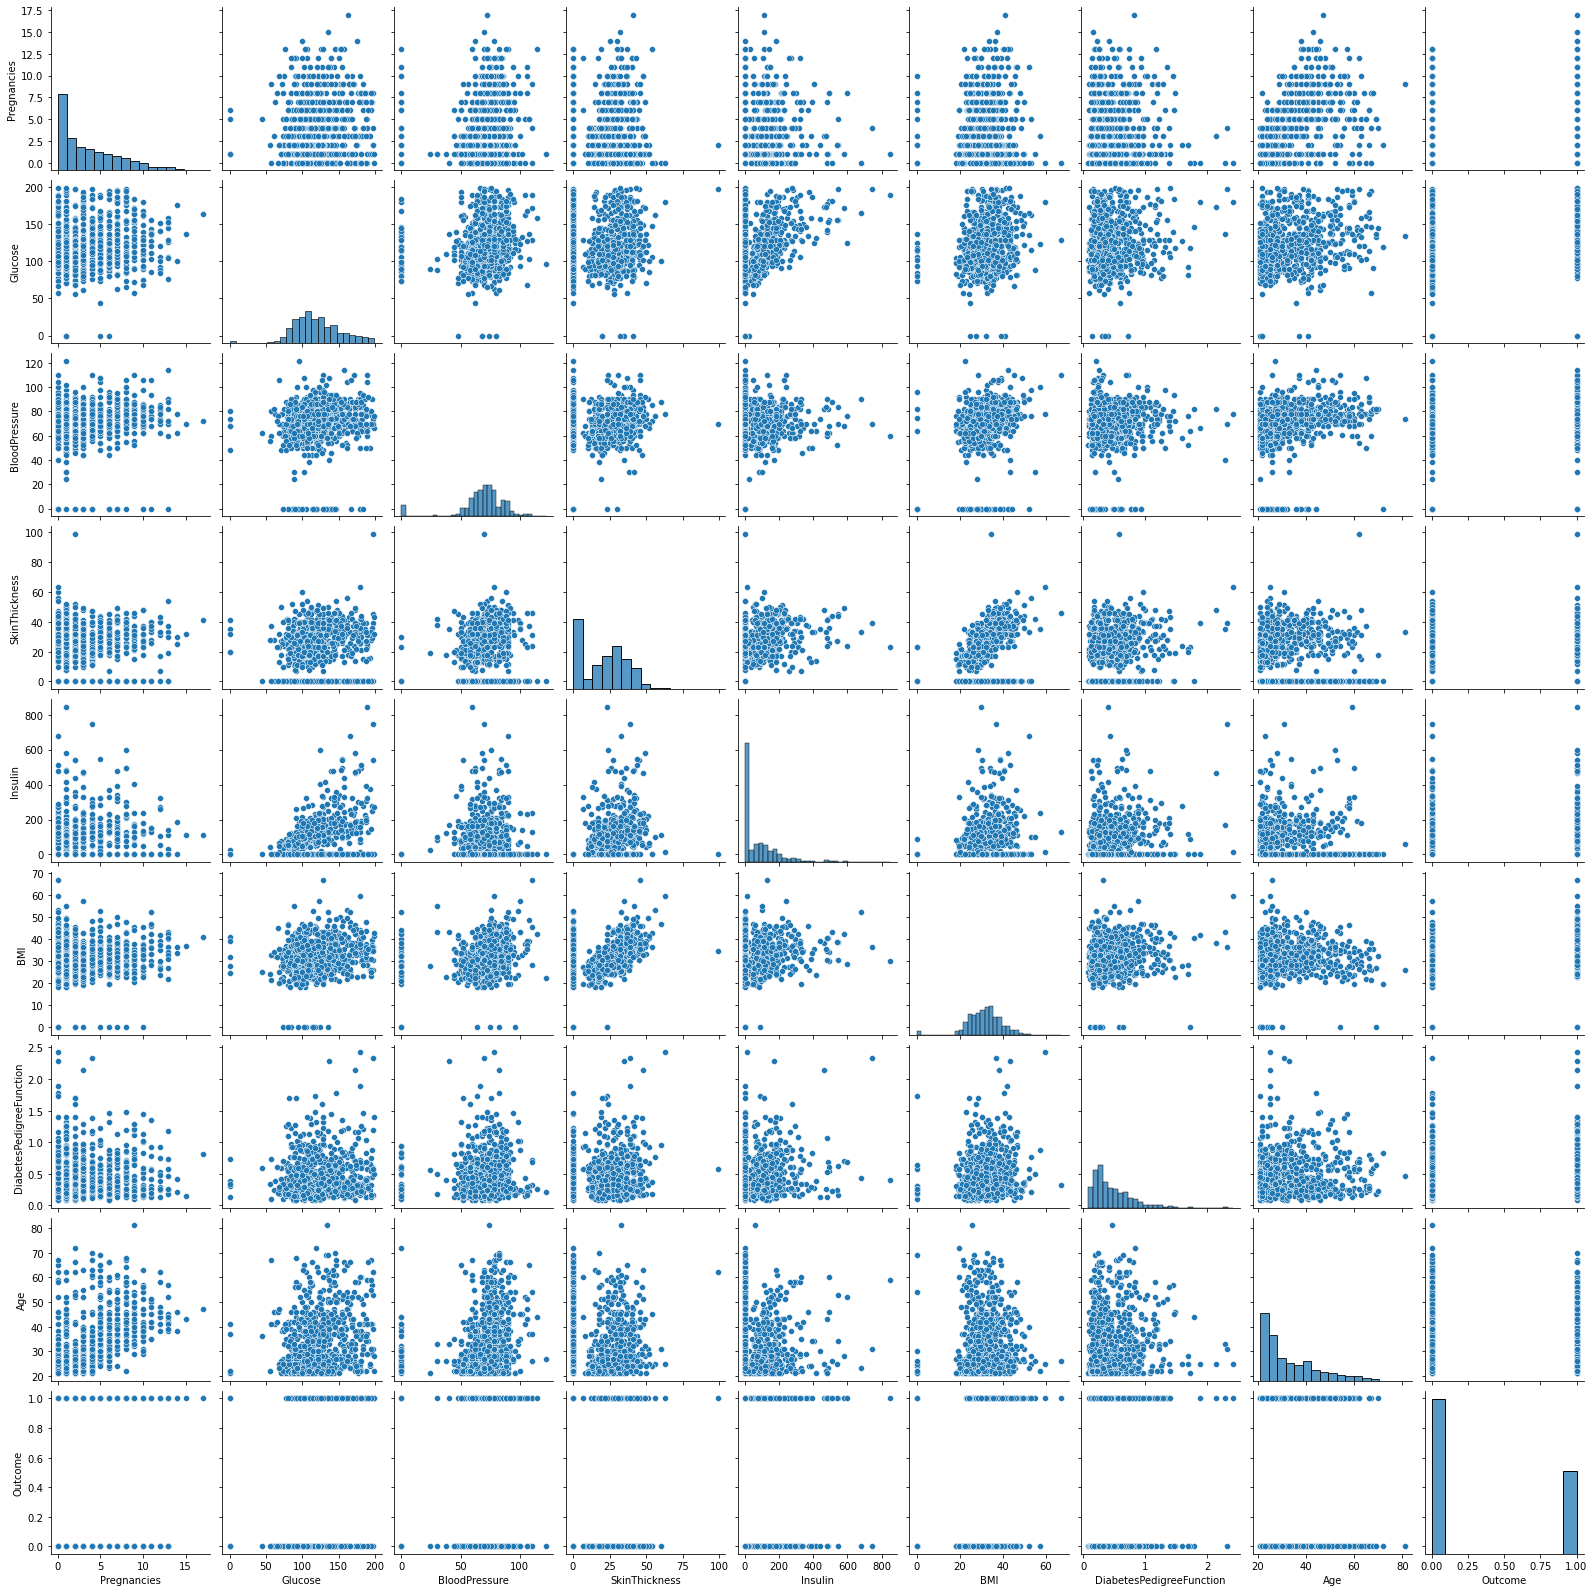

In [58]:
import matplotlib.pyplot as plt
sns.pairplot(data)
plt.savefig('pairplot.png')
plt.show()

In [ ]:
#We can see there is some skewness in the data, let's deal with data.
#Also, we can see there few data for columns Glucose, Insulin, skin thickness, BMI and Blood Pressure which have value as 0. That's not possible. You can do
#a quick search to see that one cannot have 0 values for these. Let's deal with that. we can either remove such data or simply replace it with their respective
#mean values. Let's do the latter.

In [59]:
# replacing zero values with the mean of the column
data['BMI'] = data['BMI'].replace(0, data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0, data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0, data['Glucose'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0, data['SkinThickness'].mean())
data['Insulin'] = data['Insulin'].replace(0, data['Insulin'].mean()) 


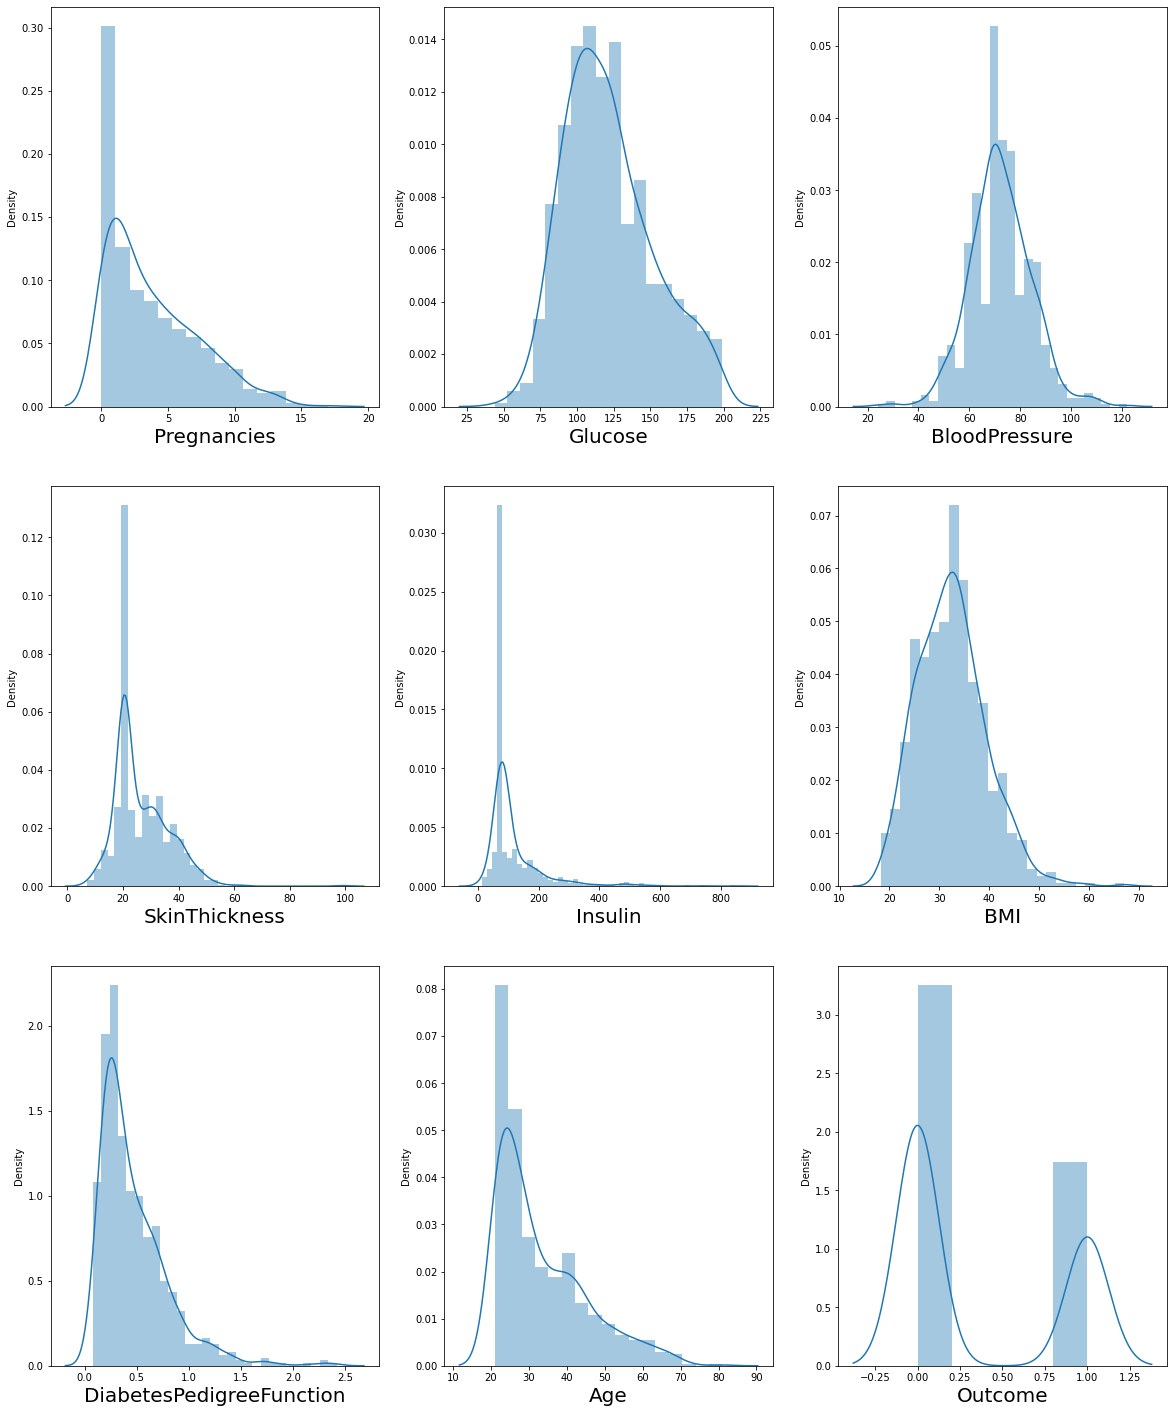

In [15]:
#Let's see how data is distributed for every column
plt.figure(figsize=(20,25))
plotnumber = 1
for column in data:
    if plotnumber<=9:
        ax = plt.subplot(3,3, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.show()

In [16]:
data.corr() #decide features hat have contributuon intraining process
#eg: pregnancies has 22% to outcome, and glucose highest 46.6%

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.013376,-0.018082,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740,0.162986
SkinThickness,0.013376,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,0.175026
Insulin,-0.018082,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652,0.179185
BMI,0.021546,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.175026,0.179185,0.312254,0.173844,0.238356,1.000000


In [60]:
data.corr()['Outcome'].sort_values()

BloodPressure               0.162986
DiabetesPedigreeFunction    0.173844
SkinThickness               0.175026
Insulin                     0.179185
Pregnancies                 0.221898
Age                         0.238356
BMI                         0.312254
Glucose                     0.492908
Outcome                     1.000000
Name: Outcome, dtype: float64

<AxesSubplot:>

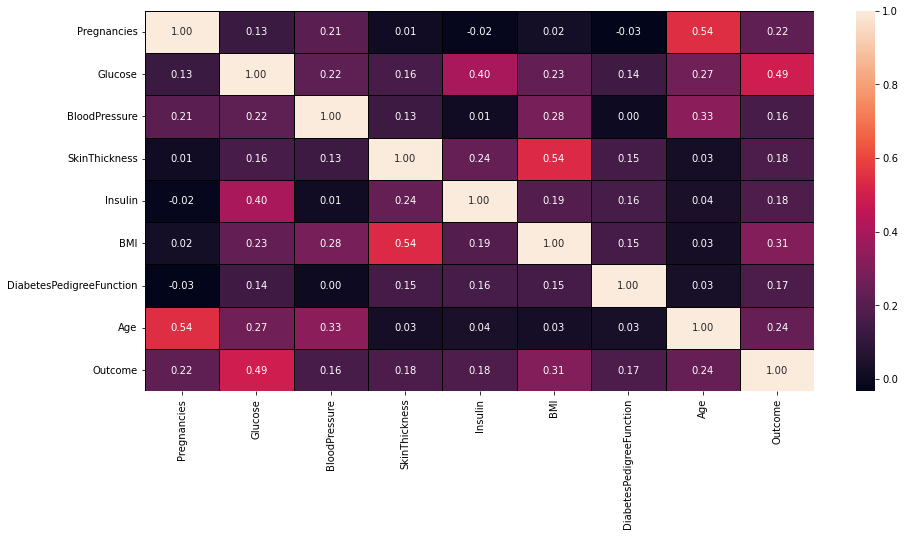

In [18]:
import matplotlib.pyplot as plt
# size of canvas
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(), annot=True, linewidths=0.5, linecolor = "black", fmt='.2f')

In [61]:
#there are still outliers in the project .Outliers cannot be detected in 'outcomes' or labels, u cannot touch this data
#outliers can only be detected in continous data not categorical, example for male or female. 
df_features = data.drop('Outcome', axis=1)
df_features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47


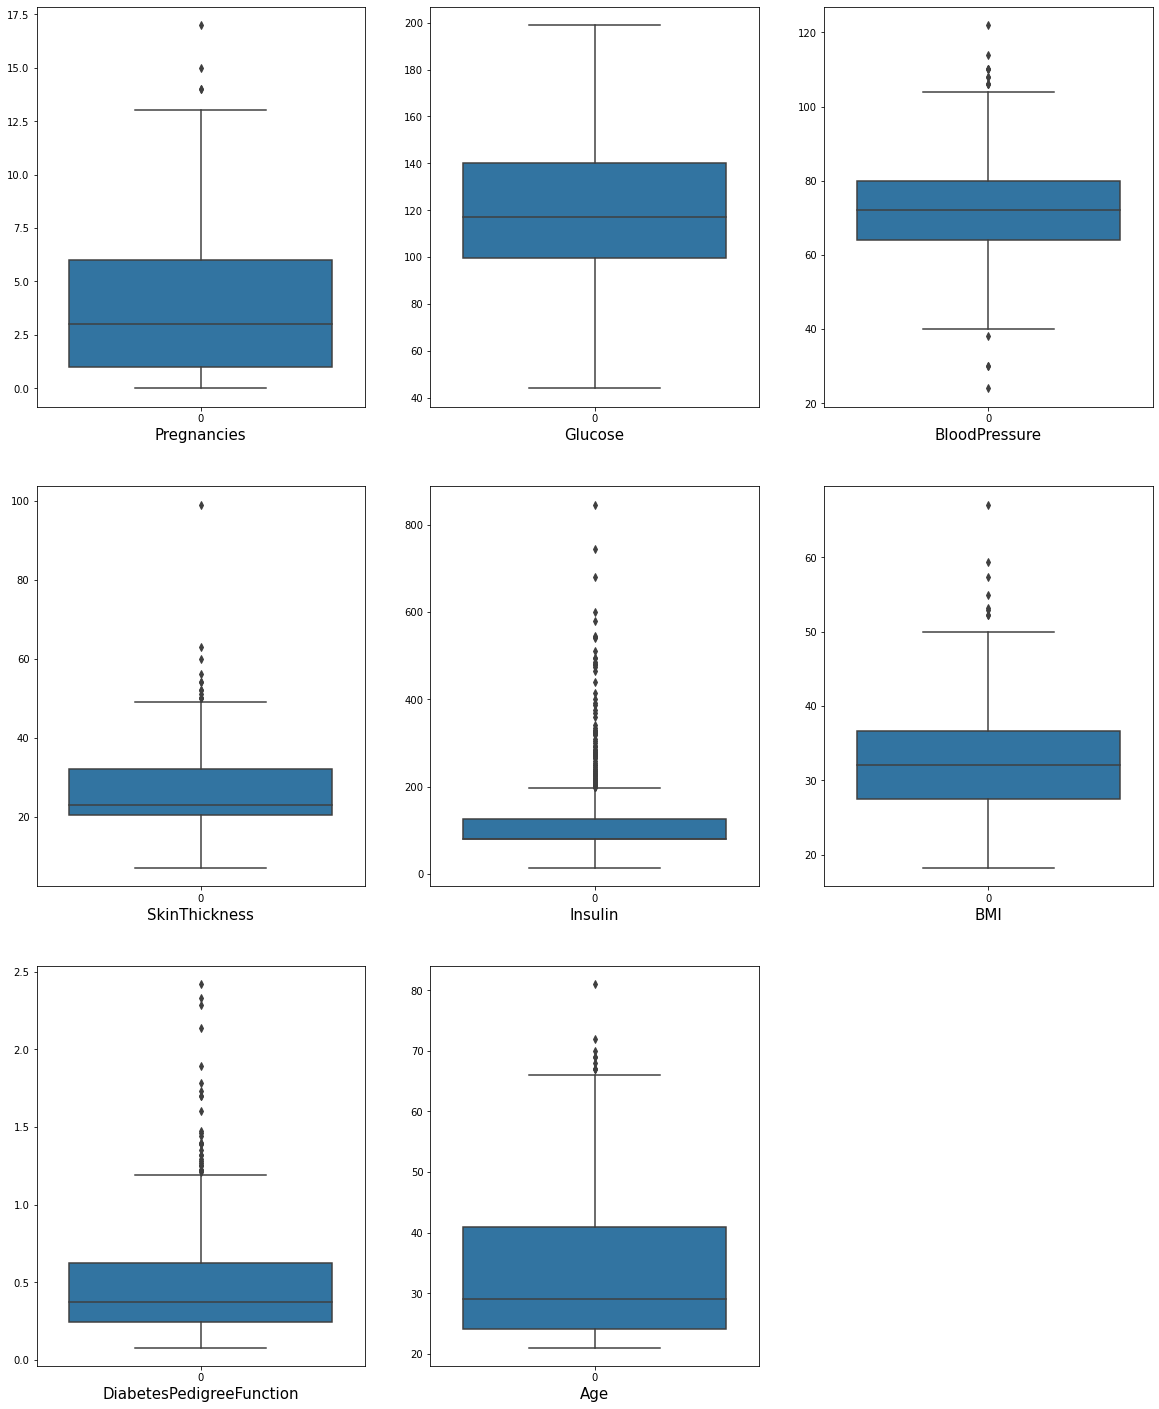

In [62]:
plt.figure(figsize=(20,25))
graph = 1
for column in df_features:
     if graph<=9:     # Visualize the outliers using boxplot
            plt.subplot (3,3,graph)
            ax=sns.boxplot(data = df_features[column])
            plt.xlabel(column, fontsize=15)
            graph+=1
plt.show()  
#not everytime u remove outiers. in this case pregnancy cannot be 15 or inuln cannot be 600.
#however in case of bnks, all accounts are mostly middle class. But there are also accouts with billions, like ambani, adani
#they have wealth, they can keep, they r not outliers, they r real. 

In [63]:
data.shape

(768, 9)

In [64]:
# Find the IQR (inter quantile range) to identify outliers
#1st quantile
q1 = data.quantile(0.25)
# 3rd quantile
q3= data.quantile(0.75)
# IQR
iqr = q3-q1
iqr

Pregnancies                  5.000000
Glucose                     40.500000
BloodPressure               16.000000
SkinThickness               11.463542
Insulin                     47.450521
BMI                          9.100000
DiabetesPedigreeFunction     0.382500
Age                         17.000000
Outcome                      1.000000
dtype: float64

In [65]:
#Outlier detection formula
#find IQR to identitfy outliers
#higher side ==> Q3 + (1.5 * IQR)
#lower side ==> Q1 - (1.5 * IQR)
# Validating one outlier all above 13.5 r outlier, check graph
preg_high = (q3.Pregnancies + (1.5*iqr.Pregnancies))
preg_high

13.5

In [67]:
# Check the indexes which have higher values
#np.where is used to find data and preg_high i given above
index=np.where(data['Pregnancies'] > preg_high) 
index #as all numbers are above 13.5, and are outliers we remove this 'pregnancy feature'

(array([ 88, 159, 298, 455], dtype=int64),)

In [68]:
# Drop the index which we found in the above cell
data=data.drop(data.index[index])
data.shape

(764, 9)

In [69]:
data.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
759,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
760,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
761,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
762,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [43]:
#removing outliers from bp
bp_high = (q3.BloodPressure + (1.5* iqr.BloodPressure))
print(bp_high)
index= np.where(data['BloodPressure'] > bp_high)
data = data.drop(data.index[index])
print(data.shape)
data.reset_index() #above 104 is outlier
#earlier we had 764 rows, now e have 758 rows, it means 10 rows we hav dropped. we removed outliers

104.0
(758, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
753,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
754,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
755,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
756,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [70]:
index #we removed 10 rows

(array([ 88, 159, 298, 455], dtype=int64),)

In [71]:
#removing skin thickness outliers from bp
st_high = (q3.SkinThickness+ (1.5* iqr.SkinThickness))
print (st_high)
index = np.where(data['SkinThickness'] > st_high)
data = data.drop(data.index[index])
print (data.shape)
data.reset_index()

49.1953125
(752, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
747,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
748,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
749,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
750,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [72]:
bmi_high=(q3.BMI+(1.5* iqr.BMI))
print(bmi_high)
index= np.where(data['BMI'] > bmi_high)
data = data.drop(data.index[index])
print (data.shape)
data.reset_index() #MI should ot be more than 50.25
#50 is high BMI, u have fat

50.25
(746, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
741,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
742,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
743,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
744,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [73]:
#too many outliers i insuline , deleted lot of rows
insu_high = (q3.Insulin+(1.5* iqr.Insulin))
print (insu_high)
index= np.where(data['Insulin'] > insu_high)
data = data.drop (data.index[index])
print(data.shape)
data.reset_index()

198.42578125
(661, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
656,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
657,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
658,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
659,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [29]:
dpf_high=(q3. DiabetesPedigreeFunction+(1.5*iqr.DiabetesPedigreeFunction))
print (dpf_high)
index= np.where(data['DiabetesPedigreeFunction']> dpf_high)
data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

1.2
(646, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
641,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
642,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
643,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
644,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [74]:
age_high = (q3.Age+(1.5*iqr.Age))
print(age_high)
index = np.where(data['Age'] > age_high)
data = data.drop(data.index[index])
print (data.shape)
data.reset_index()

66.5
(652, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
647,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
648,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
649,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
650,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [31]:
#BP we are dping again as we also have to calculate the lower side, see outlier diagram, we have only dobe upper side
bp_low=(q1.BloodPressure - (1.5* iqr.BloodPressure))
print (bp_low)
index= np.where(data['BloodPressure']<bp_low)
data = data.drop(data.index[index])
print (data.shape)
data.reset_index()

40.0
(634, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
629,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
630,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
631,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
632,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


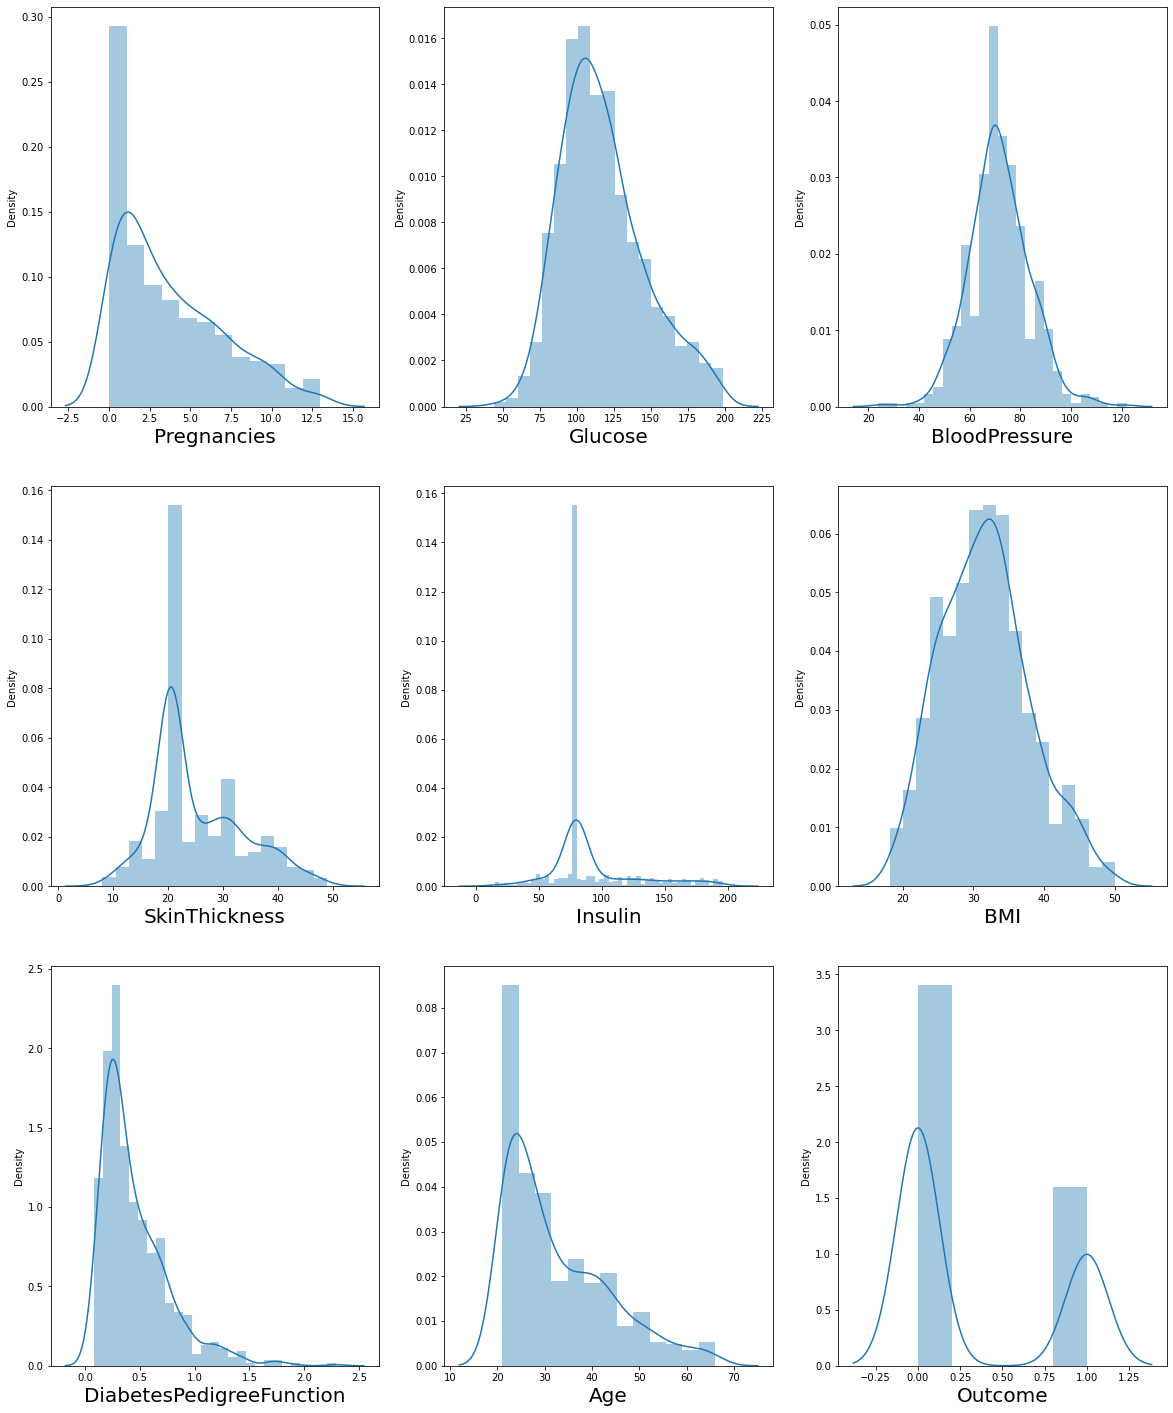

In [75]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
for column in data:
    if plotnumber<=9:
        plt.subplot (3,3, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
        
plt.show()

In [ ]:
#The data looks much better now than before. We will start our analysis with this data now as we don't want to lose important information. If our model doesn't
#work with accuracy, we will come back for more preprocessing.
#with this graph we are checking for skewness

#if u compare the sme graph drawn for insulin and u compare the latest one above, u will see , it is less skewed. previously it was 
#ging beyond 300, now in this one it stps at 200. 
#insulin cannot go beyond 300

In [76]:
X = data.drop(columns =['Outcome'])
y = data['Outcome']
#Before we fit our data to a model, let's visualize the relationship between our independent variables and the categories.

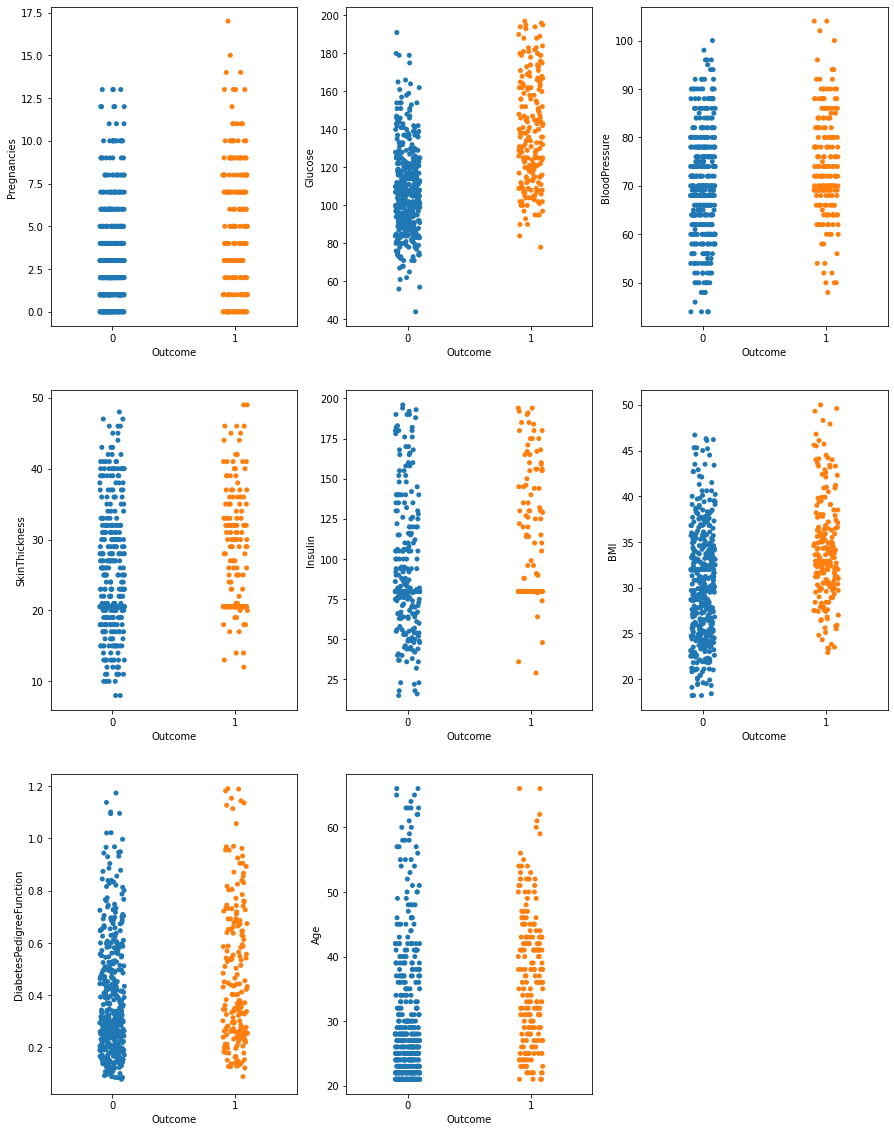

In [64]:
#Let's see how features are related to class
plt.figure(figsize=(15,20))
plotnumber = 1
for column in X:
    if plotnumber<=9 :
        plt.subplot (3,3, plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.show()

#u can see fpr glocose column if u are between 60-85 range, u r healthy
#there are no dabeteres as no orange dots. hardly ny orrage dots. copare the 2 dots density and see hw prone u r to diabetes
#as gluose goes hugher, the chances of diabetes also gets higher. there is a clean cut rel between glucose n outcome

In [91]:
# we are taking all features even if we feel some dont contribute, some contribute less while some contribute more
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)
#This is how our data looks now after scaling


In [92]:
#Great, now we will check for multicollinearity using VIF(Variance Inflation factor)
#!! Let's proceed by checking multicollinearity in the dependent variables
#Before that, we should scale our data. Let's use the standard scaler for that.
X_scaled.shape[1]

8

In [93]:
X_scaled.shape #1 is coulmns, as we needed column and zero is row.. we typed 1 as index

(652, 8)

In [79]:
#Finding variance inflation factor in each scaled column i.e X_scaled.shape[1] (1/(1-R2))
# we take r square formula, actual minus predicted data
#X_scaled is our feature 1, feature 2, feature 3...data
# is feature 1 or single feature, individually, x_scaled is collective 8 columns features, all features
vif = pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns
#Let's check the values
vif


,vif,Features
0,1.477417,Pregnancies
1,1.249737,Glucose
2,1.266887,BloodPressure
3,1.397844,SkinThickness
4,1.184972,Insulin
5,1.444745,BMI
6,1.040643,DiabetesPedigreeFunction
7,1.682469,Age


In [94]:
#All the VIF values are less than 5 and are very low. That means no multicollinearity, which means co-relation between 2 features. Now
#we can go ahead with fitting our data to the model. if it exists , ir greater than 5, we have to remove the column
# Before that, let'ssplit our data in test and training set.
x_train,x_test,y_train,y_test=train_test_split(X_scaled, y, test_size= 0.25, random_state = 355)
#y is label and x_scaled is all features

In [95]:
from sklearn.neighbors import KNeighborsClassifier #used for classification, not excellent for linear regression 
from time import time
knn = KNeighborsClassifier()
start=time()
knn.fit(x_train, y_train)
print("knn training time:", (time()-start))
start=time()
y_pred1=knn.predict(x_test)
print("knn training time:", (time()-start))

knn training time: 0.4142274856567383
knn training time: 0.6337482929229736


In [96]:
cfm=confusion_matrix(y_test,y_pred1)
cfm

array([[87, 24],
       [24, 28]], dtype=int64)

In [97]:
from sklearn.metrics import classification_report
print (classification_report(y_test,y_pred1, digits=2))
#if classification is 90, u do cross validation

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       111
           1       0.54      0.54      0.54        52

    accuracy                           0.71       163
   macro avg       0.66      0.66      0.66       163
weighted avg       0.71      0.71      0.71       163



In [ ]:
#Cross-Validation - used to remove overft data, especially high percnetage accuracy found
#Suppose you train a model on a given dataset using any specific algorithm.
#You tried to find the accuracy of the trained model using the same training data
#and found the accuracy to be 95% or maybe even 100%. What does this mean? Is your model ready for prediction? 
#The answer is no. Why? Because your model has trained itself on the given data, 
#i.e. it knows the data and it has generalized over it very well. But when you try and predict over a new set of data,
#it's most likely to give you very bad accuracy, because it has never seen the data before and thus it fails to generalizes well
#over it. This is the problem of overfitting. To tackle such problem, Cross-validation comes into the picture. Cross
#validation is a resampling technique with a basic idea of dividing the training
#dataset into two parts i.e. train and test. On one part(train) you try to train the model and on the second part(test) 
#i.e. the data which is unseen for the model,you make the prediction and check how well your model works on it.
#If the model werks with good accuracy on your test data, it means that the model has not
#overfitted the training data and can be trusted with the prediction whereas
#performs with bad acouracy then our model is not to be trusted and we need to
#tweak our algorithm.


In [ ]:
...............Let's see the different approaches of Cross Validation:
Hold Out Method:
It is the most basic of the CV techniques
It simply divides the dataset into two sets of training and test
The training dataset is used to train the model and then data is fitted in the trained model to make predictions.
We check the accuracy and assess our model on that basis. This method is used as it is computationally less costly.
But the evaluation based on the Hold-out set can have a high variance because it depends heavily on which data points end up in
the training set and which in test data. The evaluation will be different every time this division changes..............

In [ ]:
.................Let's see the different approaches of Cross Validation:
Hold Out Method:
It is the most basic of the CV techniques
It simply divides the dataset into two sets of training and test
The training dataset is used to train the model and then
test data is fitted in the trained model to make predictions. We check the accuracy and assess our model on that basis. This method is used as it is
computationally less costly. But the evaluation based on the Hold-out set cachave a high variance because it depends heavily on which data points end up in
the training set and which in test data. The evaluation will be different every time this division changes...................

In [ ]:
#....................k-fold Cross-Validation(this takes same data 5 times if k=5, one data scenario does not know abut the other,
# 5 ditiations for same data se, oly their test data portion changes everytime. the average of all 5 
                                           )
# tackle the high variance of Hold-out method, the k-fold method is used. 
#The idea is simple, divide the whole dataset into 'k' sets preferably of equal sizes.
#Then the first set is selected as the test set and the rest 'k-1' sets are used to train the data. 
#Error is calculated for this particular dataset. Then the steps are repeated, i.e. the second set is selected as the test data,
#and the remaining 'k-1' sets are used as the training data. Again, the error is calculated. Similarly, the
#process continues for 'k' times. In the end, the CV error is given as the mean of the total errors calculated individually, 
#mathematically given as:
#CV(k) =1/k Σ(k, 1=i)ΣMSE

#The variance in error decreases with the increase in "k'. The disadvantage of k fold cv is that it is computationally expensive
#as the algorithm runs from scratch for k' times ....................................

In [ ]:
#3)leave one out only cross validation - LOOCV - 9costiliest method n noone uses this) 
#it diides data into parts, splits into train and split
#finally u take the average of the data

#LOOCV is a special case of k-fold CV, where k becomes equal to n
# no of observations). So instead of creating two subsets, it selects a single
#observation as a test data and rest of data as the training data. The error is calculated for this test observations. Now
#the second observation is selected as test data, and the rest of the data is used as the training set. 
#Again, the error is calculated for this particular test observation. This process continues 'n' times
#and in the end, CV error is calculated 

In [86]:
#Kfold method (for demo). it does not have data, just maulat exmaple
from sklearn.model_selection import KFold, cross_val_score
k_f = KFold (n_splits=3, shuffle=True)
k_f


KFold(n_splits=3, random_state=None, shuffle=True)

In [89]:
for train, test in k_f.split([1,2,3,4,5,6,7,8,9,10]):
    print('train :', train,'test :',test)
#it has split data into 3 parts as discused above into training and testing data
#then it will take average of 3 models
#training and test data will differ each time

train : [2 3 4 5 6 7] test : [0 1 8 9]
train : [0 1 5 6 7 8 9] test : [2 3 4]
train : [0 1 2 3 4 8 9] test : [5 6 7]


In [99]:
#Cross Validation score to check if the model is overfitting
cross_val_score(knn, X_scaled, y, cv=10)
#here we have taken 10 , and slit into 10

array([0.66666667, 0.78787879, 0.75384615, 0.64615385, 0.78461538,
       0.64615385, 0.73846154, 0.73846154, 0.75384615, 0.8       ])

In [101]:
cross_val_score (KNeighborsClassifier(), X_scaled, y, cv=5).mean() #we have taken the mean of only 5 splits
#it has not changed much.u can keep both cv the same as well . try eith diff cv

0.7454257193188492

In [115]:
#HYPERPARAMETER TUNING - used to increase accuracy of the model. can be used for any data set ot model
#3 methods: Gridsearch CV - used 95% of times, GridSearch CV(cv is cross validation ) & randomised search cv
#same cobi will happen for kd free and brute
#the numbers can be random
from sklearn.model_selection import GridSearchCV
param_grid = { 'algorithm': ['kd_tree', 'brute'], #it will compare KD_tree leaf size 3 with 3, 5, 7, 9, 11, 13 n_neighbours respectively
'leaf_size': [3,5,6,7,8],
'n_neighbors': [3,5,7,9,11,13]
              }

In [116]:
gridsearch = GridSearchCV(estimator=knn, param_grid=param_grid)
#estimator is basically which model u r using

In [117]:
gridsearch.fit(x_train,y_train)


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [113]:
gridsearch.best_params_ #the numbers will be withing the numbers given in tree and n_neighbors

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 13}

In [121]:
# we will use the best parameters in our k-NN algorithm and check if accuracy is increasing.
knn=KNeighborsClassifier(algorithm = 'kd_tree', leaf_size=3, n_neighbors=13)


In [122]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=13)

In [123]:
y_pred1 = knn.predict(x_test)


In [125]:
cfm = confusion_matrix(y_test,y_pred1)
cfm

array([[96, 15],
       [28, 24]], dtype=int64)

In [127]:
print(classification_report(y_test,y_pred1, digits=2))

              precision    recall  f1-score   support

           0       0.77      0.86      0.82       111
           1       0.62      0.46      0.53        52

    accuracy                           0.74       163
   macro avg       0.69      0.66      0.67       163
weighted avg       0.72      0.74      0.72       163



In [84]:
log_reg = LogisticRegression() #here starts normal logistic regression 
log_reg.fit(x_train,y_train) #.fit is for training purpose

LogisticRegression()

In [77]:
#Let's see how well our model performs on the test data set.
y_pred = log_reg.predict(x_test)

In [78]:
y_pred #this is for prediction. all predict data is stored in x_test
#1 is for yes, o is fpr no diabetic person

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1], dtype=int64)

In [94]:
#how  do we know after hpw much percent the model is taking 1 and after how much percentage model is taking 0 as no diabetes
#this determines hoe good is yoir model. how good it is can be found by certain metrics
#there are 5 metrics: рос, accuracy, Recall, precision, Fi Score, Avc
# we have used accuracy 
#Model Accuracy
from sklearn.metrics import accuracy_score , confusion_matrix , roc_curve , roc_auc_score #u need to import this
accuracy = accuracy_score(y_test,y_pred)
accuracy #y_test is actual label, y_pred is predicted label

0.8269230769230769

In [80]:
#Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat 
#the model goes like TP, FP
                     #FN, TN
#106=Tp, 8 is fp, 19 is FN, 23 is TN)

array([[106,   8],
       [ 19,  23]], dtype=int64)

In [81]:
#accuracy = (TP+TN)/(TP+TN+FP+FN)...calculating manually
(106+23)/(106+23+8+19)

0.8269230769230769

In [82]:
from sklearn.metrics import classification_report
print (classification_report (y_test,y_pred))
#we only used accuracy before, we can use all methods in 1, with classification report to rpesent, use this

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       114
           1       0.74      0.55      0.63        42

    accuracy                           0.83       156
   macro avg       0.79      0.74      0.76       156
weighted avg       0.82      0.83      0.82       156



In [83]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [84]:
# thresholds [0] means no instances predicted (It should be read from 0 - max)
print ('Threshold =', thresholds)
print ('True Positive rate = ',tpr)
print ('False Positive rate = ',fpr)
#threshold is the limit beyond which u cannot go
#The indx for threshold strat backwards - 0 is 0, 1is 1, 2 is 2
#the index for ture and false positive rate is forwards
#so threshold index 0 is true positive rate 0, and false positive rate 0

Threshold = [2 1 0]
True Positive rate =  [0.         0.54761905 1.        ]
False Positive rate =  [0.         0.07017544 1.        ]


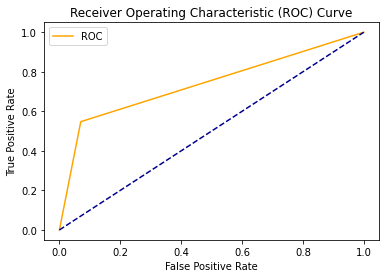

In [86]:
# thresholds [0] means no instances predicted (It should be read from 0 - max)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
#The yellow line has 3 points for threshold, 0, 1, 2 corresponding to tpr n fpr
#roc is simply the yellow curve, but auc is the entire area under blue plus yellow line

In [87]:
#How much area it is covering (AUC)
auc_score= roc_auc_score(y_test,y_pred)
print(auc_score) #78% covered under AUC

0.7387218045112782


In [ ]:
#Nearest Neighbors(used for classifivation-malignant tumor or benevelont tumor, rarely used for regression )
#K-nearest neighbors (KNN) is a type of supervised learning algorithm which is used for both regression and classification purposes, but mostly it is used for
#later. Given a dataset with different classes, KNN tries to predict the correct class of test data by calculating the distance between the test data and all the
#training points. It then selects the k points which are closest to the test data. Once the points are selected
#the algorithm calculates the probability (in case of
#classification) of the test point belonging to the classes of the k training points and the class with the highest probability is selected. In the case of a regressi
#problem, the predicted value is the mean of the k selected training points.

# ways to calculate nearest neighbprs:
#Euclidean Distance:
#Manhattan distance

In [ ]:
#Euclidean Distance:
#It is the most commonly used method to calculate the distance between two points
#The Euclidean distance between two points= d(p,q)= (q1-p1) square+q2-p2)square
#tale the square root of abpve formula, u do this for all data points
#u calculate the 2 sides of the triange, the third side of the perpendicular truangle , euclidean is the thrd side


In [ ]:
#KNNalgorithms are often termed as Lazy learners
#it doesn't create
#generalized model for the training set but waits for the test data. Once test data is provided then only it starts genering the training data to classify the tes
#data. So, a lazy learner just stores the training data and waits for the test set
#Pros and Cons of k-NN Algorithm
#Pros:
#It can be used for both regression and classification problems.
#It is very simple and easy to implement.
#Mathematics behind the algorithm is easy to understand.
#There is no need to create model or do hyperparameter tuning.
#KNN doesn't make any assumption for the distribution of the given data.
#There is not much time cost in training phase.
#So, a lazy learner just stores the training data and waits for the test set. Such algorithms work less while training and more while classifying a given tes
#dataset.

In [ ]:
#:
# the optimum value of 'k'L
#It takes a lot of time to compute the distance between each test sample and all training samples.
#Since the model is not saved beforehand in this algorithm (lazy learner), so ery time one predicts a test value,
#it follows the same steps again and again.
#Since, we need to store the whole training set for every test set, it requires a lot of space.
#It is not suitable for high dimensional data.
#Expensive in testing 
# of kD neighbours:
#1.brute force
#2. kd tree method(mostly used)
#3. ball tree

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               623 non-null    int64  
 1   Glucose                   623 non-null    float64
 2   BloodPressure             623 non-null    float64
 3   SkinThickness             623 non-null    float64
 4   Insulin                   623 non-null    float64
 5   BMI                       623 non-null    float64
 6   DiabetesPedigreeFunction  623 non-null    float64
 7   Age                       623 non-null    int64  
 8   Outcome                   623 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 48.7 KB


In [85]:
log_reg = LogisticRegression()
pred_lr= log_reg.predict(x_test)
from sklearn.model_selection import cross_val_score
lss = accuracy_score(y_test, pred_lr)
for j in range (2,10):
    lsscore = cross_val_score (lr,x,y,cv=j)
    lsscore.mean()
print("At cv:-",j)
print("Cross validation score is:-",lsc*100 )

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.